In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_excel('./dataset.xlsx', sheet_name='emergencia')
df = pd.read_excel('./dataset2.xlsx', sheet_name='emergencia')

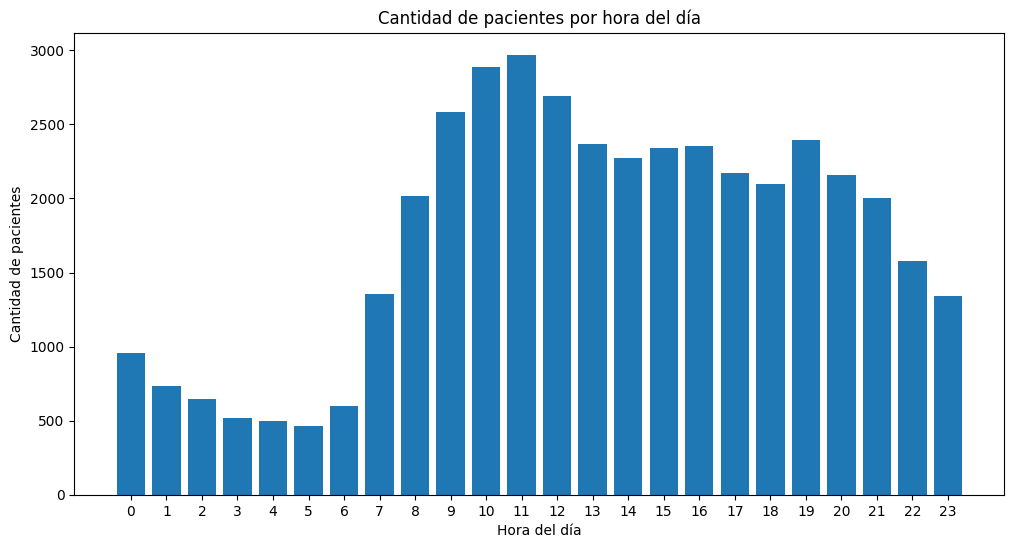

In [44]:
# Convertir la columna 'INICIO_ATENCION' a tipo datetime
df['INICIO_ATENCION'] = pd.to_datetime(df['INICIO_ATENCION'])

# Extraer la hora del día y el mes
df['HORA_DEL_DIA_ATENCION'] = df['INICIO_ATENCION'].dt.hour
df['MES_ANO_ATENCION'] = df['INICIO_ATENCION'].dt.month_name()

# Análisis de la llegada de pacientes por hora del día
conteo_por_hora = df.groupby('HORA_DEL_DIA_ATENCION').size()
plt.figure(figsize=(12, 6))
plt.bar(conteo_por_hora.index, conteo_por_hora.values)
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pacientes')
plt.title('Cantidad de pacientes por hora del día')
# Ajustar el eje x para que vaya de 0 a 24 con intervalos de 1
plt.xticks(range(0, 24, 1))
plt.show()

In [45]:
df.head()

,ID_ATENCION,INICIO_ATENCION,FIN_ATENCION,GENERO,ID_PACIENTE,HORA_DEL_DIA_ATENCION,MES_ANO_ATENCION,FECHA
0,2959,2022-01-01 00:42:14,2022-01-05 17:40:40,M,431528,0,January,2022-01-01
1,2960,2022-01-01 00:58:15,2022-01-01 02:42:00,F,451061,0,January,2022-01-01
2,2961,2022-01-01 01:39:40,2022-01-01 03:05:00,M,844761,1,January,2022-01-01
3,2962,2022-01-01 03:09:56,2022-01-01 06:51:00,F,867537,3,January,2022-01-01
4,2963,2022-01-01 07:52:16,2022-01-01 09:23:23,F,95460,7,January,2022-01-01


In [46]:
df.head()

,ID_ATENCION,INICIO_ATENCION,FIN_ATENCION,GENERO,ID_PACIENTE,HORA_DEL_DIA_ATENCION,MES_ANO_ATENCION,FECHA
0,2959,2022-01-01 00:42:14,2022-01-05 17:40:40,M,431528,0,January,2022-01-01
1,2960,2022-01-01 00:58:15,2022-01-01 02:42:00,F,451061,0,January,2022-01-01
2,2961,2022-01-01 01:39:40,2022-01-01 03:05:00,M,844761,1,January,2022-01-01
3,2962,2022-01-01 03:09:56,2022-01-01 06:51:00,F,867537,3,January,2022-01-01
4,2963,2022-01-01 07:52:16,2022-01-01 09:23:23,F,95460,7,January,2022-01-01


In [6]:
df['FECHA'] = df['INICIO_ATENCION'].dt.date

# Contar la frecuencia de cada fecha y crear un nuevo DataFrame
conteo_fechas_df = df['FECHA'].value_counts().reset_index()
conteo_fechas_df.columns = ['FECHA', 'NUMERO_OCURRENCIAS']

# Imprimir el nuevo DataFrame
print(conteo_fechas_df)

          FECHA  NUMERO_OCURRENCIAS
0    2022-01-24                  99
1    2022-01-16                  97
2    2022-01-12                  96
3    2022-01-10                  96
4    2022-01-09                  95
..          ...                 ...
756  2024-01-25                  32
757  2024-01-12                  32
758  2022-02-23                  32
759  2022-08-31                  30
760  2023-08-22                  30

[761 rows x 2 columns]


In [7]:
df['FECHA'] = df['INICIO_ATENCION'].dt.date
# Crear el pivot table contando el número de pacientes por día
pivot_table = df.pivot_table(index='FECHA', aggfunc='size')


# Mostrar el pivot table con el nombre de la columna
print(pivot_table)


FECHA
2022-01-01    71
2022-01-02    85
2022-01-03    79
2022-01-04    92
2022-01-05    82
              ..
2024-01-27    46
2024-01-28    50
2024-01-29    45
2024-01-30    42
2024-01-31    52
Length: 761, dtype: int64


In [8]:
pivot_table = conteo_fechas_df.pivot_table(index='FECHA', values='NUMERO_OCURRENCIAS')

# Imprimir el pivot table
print(pivot_table)

            NUMERO_OCURRENCIAS
FECHA                         
2022-01-01                  71
2022-01-02                  85
2022-01-03                  79
2022-01-04                  92
2022-01-05                  82
...                        ...
2024-01-27                  46
2024-01-28                  50
2024-01-29                  45
2024-01-30                  42
2024-01-31                  52

[761 rows x 1 columns]


In [9]:
ocurrency = pivot_table['NUMERO_OCURRENCIAS']

In [10]:
ocurrency.index = pd.to_datetime(ocurrency.index)

# Convierte la Serie en un DataFrame
ocurrency_df = pd.DataFrame({'FECHA': ocurrency.index, 'OCURRENCIAS': ocurrency.values})

# Establecer 'FECHA' como el índice del DataFrame
ocurrency_df.set_index('FECHA', inplace=True)

In [11]:
# definir variables dataset
#stock_name = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-11-30'
pred_end_date = '2024-01-31'

In [12]:
# preparar datos de entrenamiento y prueba
train_set = ocurrency.loc[:end_date]
test_set = ocurrency.loc[end_date:pred_end_date]

In [13]:
train_set

FECHA
2022-01-01    71
2022-01-02    85
2022-01-03    79
2022-01-04    92
2022-01-05    82
              ..
2023-11-26    64
2023-11-27    62
2023-11-28    55
2023-11-29    51
2023-11-30    59
Name: NUMERO_OCURRENCIAS, Length: 699, dtype: int64

In [14]:
test_set

FECHA
2023-11-30    59
2023-12-01    54
2023-12-02    64
2023-12-03    58
2023-12-04    67
              ..
2024-01-27    46
2024-01-28    50
2024-01-29    45
2024-01-30    42
2024-01-31    52
Name: NUMERO_OCURRENCIAS, Length: 63, dtype: int64

In [15]:
#calcular la variadcion diaria de precios
daily_data = ((train_set - train_set.shift(1))/ train_set.shift(1))[1:]
daily_data

FECHA
2022-01-02    0.197183
2022-01-03   -0.070588
2022-01-04    0.164557
2022-01-05   -0.108696
2022-01-06    0.048780
                ...   
2023-11-26    0.103448
2023-11-27   -0.031250
2023-11-28   -0.112903
2023-11-29   -0.072727
2023-11-30    0.156863
Name: NUMERO_OCURRENCIAS, Length: 698, dtype: float64

In [16]:
train_set.shift(1)

FECHA
2022-01-01     NaN
2022-01-02    71.0
2022-01-03    85.0
2022-01-04    79.0
2022-01-05    92.0
              ... 
2023-11-26    58.0
2023-11-27    64.0
2023-11-28    62.0
2023-11-29    55.0
2023-11-30    51.0
Name: NUMERO_OCURRENCIAS, Length: 699, dtype: float64

In [17]:
# calcular mu y sigma para los cambios de x
mu = daily_data.mean()
sigma = daily_data.std()
mu, sigma

(0.01634836968549749, 0.18565584455245626)

In [18]:
# defininir los parametros para nuestra simulacion
time_delta = 1 #dia
time_period = len(test_set)
time_period

63

In [19]:
time_points =  int(time_period/time_delta)
time_points

63

In [20]:
# crear un arreglo que contenga cada tiempo de simulacion
time = np.arange(1, time_points+1)
time


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [21]:
#crear arreglo donde guardadremos nuestras predicciones
price_prediction = np.zeros(time_points)
price_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
#definir precio inicial
price_initial = train_set[-1]
price_prediction[0] = price_initial 
price_prediction

array([59.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [23]:
# generar numeros aleatorios
epsilon = np.random.normal(0,1, time_points)
epsilon

array([-0.26355709, -0.62587082,  0.88819404,  0.16364646, -0.37210747,
        0.76051636, -1.40802998,  1.10911915, -1.56124355,  0.54551855,
        0.10386215,  0.57771758,  0.65874698, -0.83704569,  0.41498596,
       -1.33753936,  1.32212423, -0.34124849,  0.62473799,  1.17533992,
       -0.43805911, -1.55345068,  1.5297825 ,  2.07005006, -0.785022  ,
       -0.62381945,  0.12707766, -0.95500673, -1.64774945,  0.7070362 ,
       -0.13751667,  1.63023442, -0.55868817, -0.94069229,  0.31351828,
       -0.10417242,  0.5337201 , -0.93853641,  0.44077356,  0.23292817,
       -0.30402426,  0.26804873, -0.71413757,  0.76184599,  0.31391873,
        0.64937137,  1.41516904,  0.13282363, -0.93465898,  2.18952636,
       -0.43708431,  0.22969708,  0.23632801,  0.49399809, -0.13994849,
       -0.14372731,  0.37213875,  1.26548813,  0.56279097, -0.65079486,
       -1.20877284, -0.78869933,  1.19712924])

In [24]:
# aplicar la ecuacion para las predicciones
for i in range(time_points-1):
    price_prediction[i + 1] = price_prediction[i] * np.exp((mu - 0.5 * sigma**2) * time_delta + sigma * np.sqrt(time_delta) * epsilon[i])

In [25]:
price_prediction

array([ 59.        ,  56.13283039,  49.93082765,  58.82996529,
        60.59107368,  56.49645994,  65.00645752,  50.00844745,
        61.38838916,  45.90073133,  50.74809497,  51.69034528,
        57.49178042,  64.91356003,  55.52139481,  59.91502636,
        46.69885541,  59.63806644,  55.92735492,  62.74972517,
        77.9819389 ,  71.82720731,  53.78370081,  71.38571987,
       104.745025  ,  90.45924915,  80.4952406 ,  82.34395881,
        68.90417944,  50.69954027,  57.76000432,  56.25416701,
        76.07022983,  68.51464986,  57.48458875,  60.87592123,
        59.65701942,  65.81280322,  55.23981339,  59.89724206,
        62.48892006,  59.00721383,  61.96308725,  54.22105765,
        62.40371661,  66.09016891,  74.49216246,  96.78989947,
        99.11853437,  83.25480722, 124.90064233, 115.06366982,
       119.97034109, 125.24033292, 137.14825727, 133.51242961,
       129.88183652, 139.04938307, 175.71945807, 194.90036741,
       172.5658573 , 137.75510768, 118.88601892])

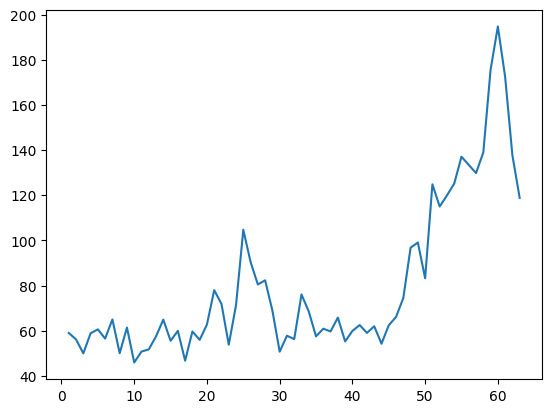

In [26]:
plt.plot(time, price_prediction)

In [27]:
train_set.max()

99

In [28]:
#generar multiples simulaciones
n_simulations = 100
predictions = []
for i in range(n_simulations):
    epsilon = np.random.normal(0,1, time_points)
    price_prediction = np.zeros(time_points)
    price_prediction[0] = price_initial
    for j in range(time_points-1):
        price_prediction[j + 1] = price_prediction[j] * np.exp((mu - 0.5 * sigma**2) * time_delta + sigma * np.sqrt(time_delta) * epsilon[j])
        """ if price_prediction[j + 1] > 99:
            price_prediction[j + 1] = price_prediction[j] """
        
    predictions.append(price_prediction)


In [29]:
predictions

[array([ 59.        ,  67.59492828,  58.19211585,  69.26162521,
         72.58865442,  60.53350089,  78.57239708,  68.32783013,
         84.2043361 ,  91.60222799, 113.30217797,  74.5687985 ,
         62.75741893,  71.40043138,  58.13638315,  57.00212334,
         62.73410661,  69.1212188 ,  51.39710549,  83.63083678,
         69.52309859,  58.43241124,  53.47052983,  47.27073479,
         57.4313258 ,  68.77238826,  54.16312086,  50.11920417,
         40.54017759,  39.08153241,  42.97440515,  43.24713563,
         48.28316238,  51.90660892,  46.58371889,  51.75539393,
         40.96428928,  53.34532424,  56.65830264,  67.83152779,
         65.20652055,  70.88386789,  64.5546093 ,  66.18484566,
         68.58459001,  61.6473384 ,  54.34686469,  47.3726147 ,
         46.38236043,  44.70903724,  46.82466448,  36.18515722,
         38.56056346,  41.38161755,  46.78607974,  48.71237846,
         58.80180436,  43.93864108,  28.22028484,  20.78033447,
         25.79000801,  30.42183748,  24.

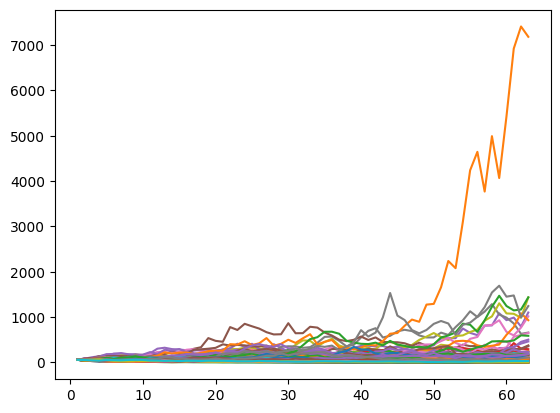

In [30]:
for predictions in predictions:
    plt.plot(time, predictions)
plt.show()

In [31]:
predictions_max =  [np.max(daily_predictions).max() for daily_predictions in zip(predictions)]
predictions_min =  [np.min(daily_predictions).min() for daily_predictions in zip(predictions)]
predictions_average =  0.5 * np.array(predictions_max) + 0.5 * np.array(predictions_min)
predictions_average

array([59.        , 55.00991509, 45.45527041, 39.75699524, 56.47526425,
       50.91685213, 46.66582238, 56.24244049, 57.72331181, 57.00930049,
       43.17748522, 41.82414957, 35.7632833 , 39.23594275, 31.11737118,
       37.10937641, 37.76975988, 32.40168546, 39.07580215, 35.85353122,
       36.69199037, 32.40479091, 26.05805808, 26.0268352 , 27.3149522 ,
       36.05206902, 29.59688194, 29.5861285 , 19.93385044, 21.26417782,
       17.42182384, 18.56976645, 18.65486549, 28.31393805, 29.04158343,
       27.47908899, 26.84882199, 21.05898645, 26.69033041, 21.98431494,
       21.03316477, 20.36457147, 22.02201078, 24.25250526, 20.52344958,
       18.78246362, 20.56307336, 18.78662538, 12.67166174, 12.02230079,
       13.71248539, 18.58024276, 16.37259097, 14.18406339, 21.45540093,
       26.31605261, 21.43437445, 23.4454564 , 29.33701589, 27.7813293 ,
       32.03011246, 31.56171426, 33.42200231])

In [32]:
final_dataframe = pd.DataFrame({'Date': test_set.index, 'Real': test_set.values, 'Simulated': predictions_average})
final_dataframe

,Date,Real,Simulated
0,2023-11-30,59,59.000000
1,2023-12-01,54,55.009915
2,2023-12-02,64,45.455270
3,2023-12-03,58,39.756995
4,2023-12-04,67,56.475264
...,...,...,...
58,2024-01-27,46,29.337016
59,2024-01-28,50,27.781329
60,2024-01-29,45,32.030112
61,2024-01-30,42,31.561714


In [40]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(final_dataframe['Real'], final_dataframe['Simulated'])

40.54344497724978

In [41]:
def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

mean_absolute_error(final_dataframe['Real'], final_dataframe['Simulated'])

20.09079131729335

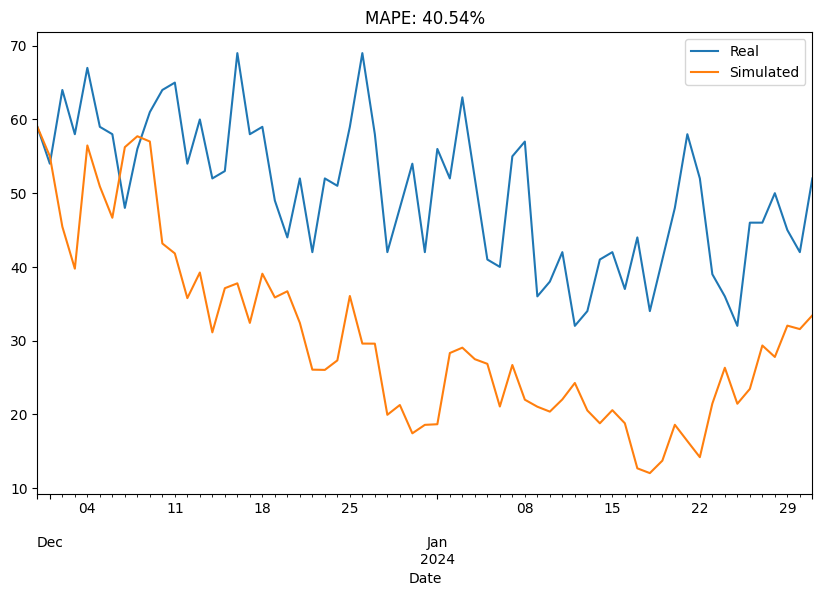

In [43]:
final_dataframe.plot(x='Date', y=['Real', 'Simulated'], figsize=(10, 6))
# poner en un label el mape
mape  = mean_absolute_percentage_error(final_dataframe['Real'], final_dataframe['Simulated'])
plt.title(f'MAPE: {mape:.2f}%')


plt.show()